# Q-Learning
In this notebook, you are going to implement a method of model-free reinforcement learning, called Q-Learning. This method follows an *off-policy* strategy. 

The total points of **Q-Learning** implementation is **40 POINTS**.

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gridworld import Environment
from utils import plot_policy, plot_action_values, test_agent

c:\Users\vamsi\miniconda3\Lib\site-packages\pygame\pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
c:\Users\vamsi\miniconda3\Lib\site-packages\pkg_resources\__init__.py:3144: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('ruamel')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Environment()
state = env.reset()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros((env.GH, env.GW, env.ACTIONS))

#### Create the target policy $\pi(s)$

In [4]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

#### Create the exploratory policy using $\epsilon$-greedy strategy

In [5]:
#TODO: You need to implement the epsilon-greedy strategy as a exploratory policy. (10 points)
def exploratory_policy(state, epsilon=0.1):
    if np.random.random() < epsilon:
        # Explore: choose a random action with uniform probability
        return np.random.randint(env.ACTIONS)
    else:
        # Exploit: choose the action with the maximum Q-value
        q_values = action_values[state[0], state[1], :]
        max_q = np.max(q_values)
        # Find all actions with the maximum Q-value
        best_actions = np.where(q_values == max_q)[0]
        # If there are multiple best actions, choose one randomly
        return np.random.choice(best_actions)

#### Plot the value table $Q(s,a)$

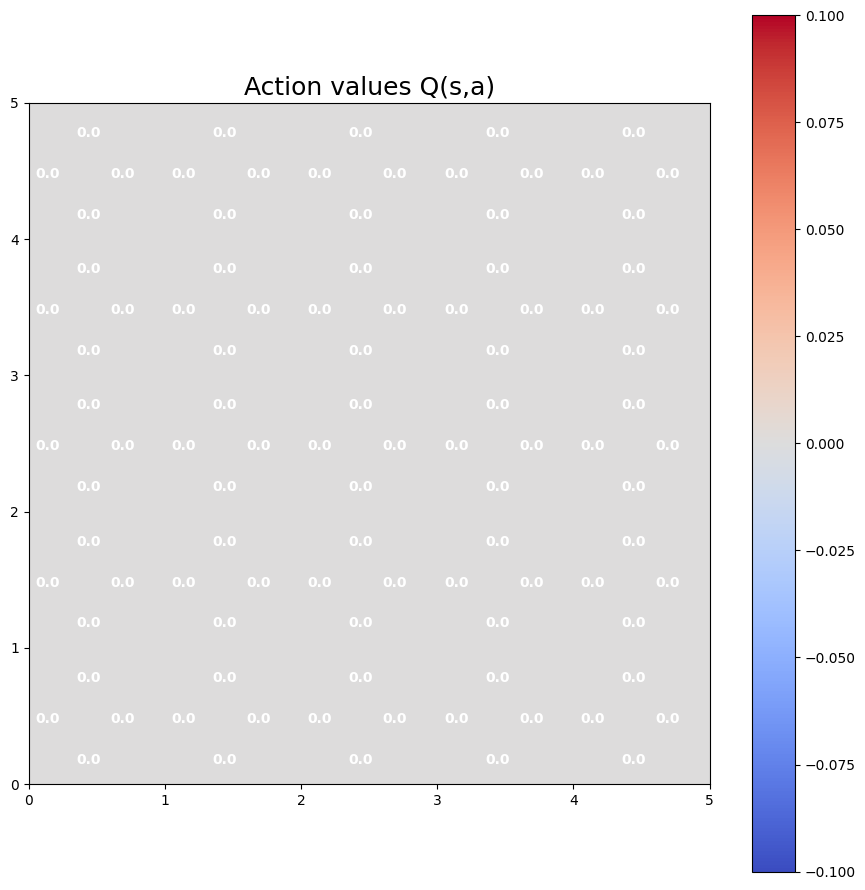

In [6]:
plot_action_values(action_values)

#### Plot the policy

<Figure size 600x600 with 0 Axes>

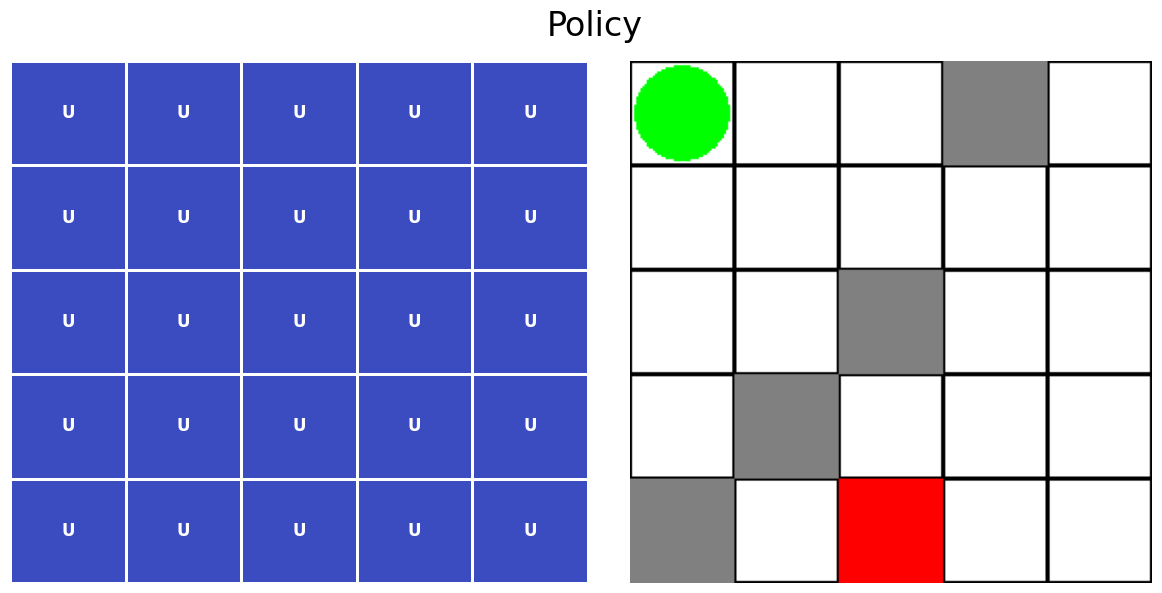

In [7]:
frame = env.render()
plt.figure(figsize=(6,6))
plot_policy(action_values, frame)

## Implement the algorithm

## Implement the Q-learning algorithm
<!-- <div style="text-align:center"> -->
<a target="_parent">
    <img src="q-learning.png" width="60%"/>
</a> 

Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
<!-- </div> -->

In [ ]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
    env = Environment()
    
    for episode in range(episodes):
        state = env.reset()  # Initialize S
        
        while True:
            # Choose A from S using policy derived from Q (epsilon-greedy)
            action = exploratory_policy(state)
            
            # Take action A, observe R, S'
            next_state, reward, done, _ = env.step(action)
            
            # Q(S,A) ← Q(S,A) + alpha[R + gamma* max_a Q(S',a) - Q(S,A)]
            current_q = action_values[state[0], state[1], action]
            next_max_q = np.max(action_values[next_state[0], next_state[1], :])
            
            # Q-learning update rule
            action_values[state[0], state[1], action] += alpha * (reward + gamma * next_max_q - current_q)
            
            # S ← S'
            state = next_state
            
            if done:
                break  # Episode ends when S is terminal
    
    return action_values


In [9]:
action_values = q_learning(action_values, exploratory_policy, target_policy, episodes=1000)

## Show results

#### Show resulting value table $Q(s,a)$

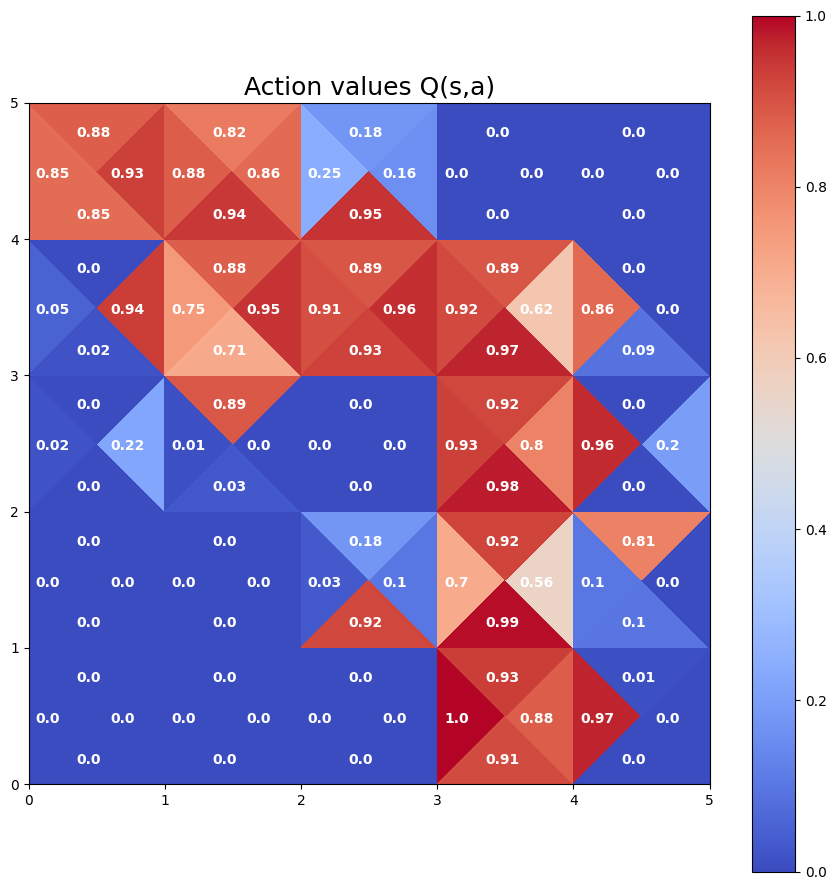

In [10]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

<Figure size 600x600 with 0 Axes>

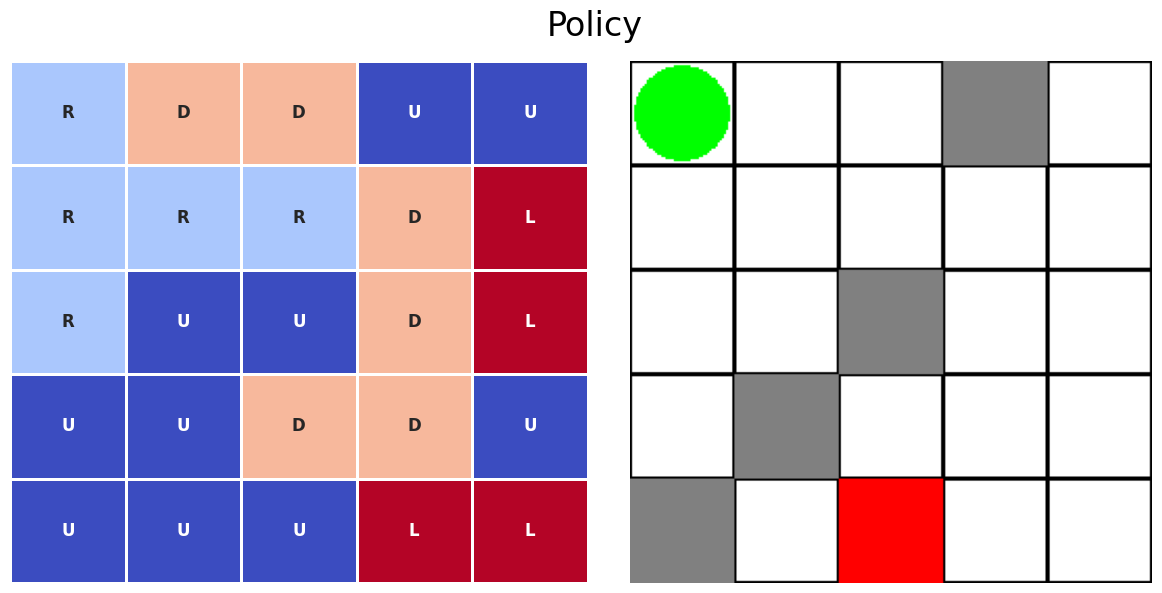

In [11]:
frame = env.render()
plt.figure(figsize=(6,6))
plot_policy(action_values, frame)

#### Test the resulting agent

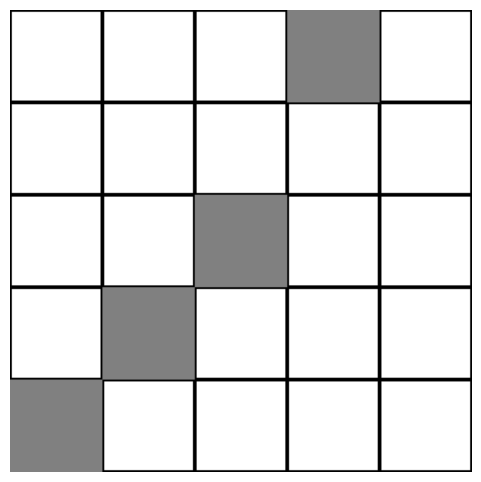

In [13]:
test_agent(env, target_policy, 1)
# test_agent(env, target_policy)